## 1- Load the required modeules

In [2]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.cross_validation as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
%matplotlib inline

## 2- Load the data

In [3]:
# Carreguem el fitxer de digits 
digits = ds.load_digits()
# Separem entre dades i etiqueta
X = digits.data
y = digits.target
# Veiem rang dels valors i mides
# Les variables son arrays de numpy i tenen mÃ¨todes especials associats
print((X.min(), X.max()))
# Nombre de files i nombre de columnes. Imatge Ã©s de 8x8 pixels = 64 de llarg.
print(X.shape)

(0.0, 16.0)
(1797L, 64L)


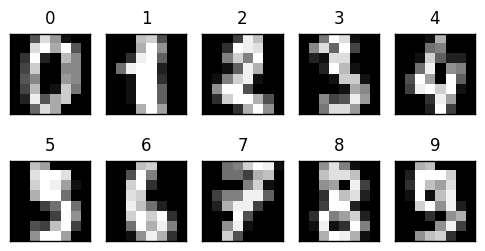

In [4]:
# Mostrem un plot de les figures amb un exemple de cada digit.
nrows, ncols = 2, 5
plt.figure(figsize=(6,3));
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([]);
    plt.title(digits.target[i]);
plt.show()

## 3- Simple cross-validation

In [5]:
# Fem un cross-validation: Partim entre training i test amb test un 25% del total
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.25)

# Definim un knn classificador
knc = nb.KNeighborsClassifier()
# Ajustem amb les dades de train
knc.fit(X_train, y_train);
# Avaluem amb el test
print knc.score(X_test, y_test)

# Veiem la matriu de confussió
from sklearn.metrics import confusion_matrix
y_pred = knc.predict(X_test)
print sklearn.metrics.confusion_matrix(y_test, y_pred)

0.988888888889
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 46  0  0  0  0  1  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 49  1  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  1  0  0  0  1 45]]


### Let's build a one by hand to see prediction

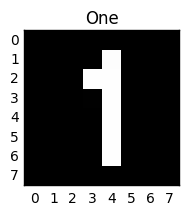

[1]


In [7]:
one = np.zeros((8, 8))
one[1:-1, 4] = 16  # The image values are in [0, 16].
one[2, 3] = 16

# Dibuixem el 1
plt.figure(figsize=(2,2));
plt.imshow(one, interpolation='none');
plt.grid(False);
plt.xticks(); plt.yticks();
plt.title("One");
plt.show()
print knc.predict(one.reshape(1, 64))

## 4- Let's do a 10-fold cross-validation

In [9]:
# Metode 1
# Pero aixo es sols un cross-validation. Fem un 10-fold cross-validation
from sklearn.cross_validation import cross_val_score  
from sklearn.cross_validation import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X,  
                            y=y,  
                            cv=10, scoring='accuracy')  
# imprimim els resultats de cada folder
print cv_scores
# obtenim la mitjana de les 10 execucions
print np.mean(cv_scores)

[ 0.92972973  0.98907104  0.97790055  0.97777778  0.96648045  0.98324022
  0.98882682  0.98314607  0.97740113  0.96590909]
0.973948287255


In [10]:
# Metode 2
# Fer el següent si volem veure matriu de confussió i ser més lliures en funció avaluació
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X, y=y,  cv=10)  
print sklearn.metrics.confusion_matrix(y, predicted)
print sklearn.metrics.accuracy_score(y, predicted)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   3 170   0   0   0   0   1   3   0]
 [  0   0   1 178   0   1   0   2   1   0]
 [  0   1   0   0 178   0   0   2   0   0]
 [  0   0   0   0   0 177   1   0   0   4]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   0   0   0 176   0   3]
 [  0   9   1   1   0   0   0   1 162   0]
 [  0   2   0   4   1   1   0   1   1 170]]
0.973845297718


In [11]:
from sklearn import metrics
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        51
          1       0.97      1.00      0.99        38
          2       1.00      0.98      0.99        47
          3       1.00      1.00      1.00        48
          4       0.98      1.00      0.99        48
          5       1.00      0.98      0.99        50
          6       0.97      1.00      0.99        36
          7       0.97      1.00      0.99        38
          8       0.98      0.98      0.98        47
          9       1.00      0.96      0.98        47

avg / total       0.99      0.99      0.99       450



## 5- Finding parameters for k-NN

In [12]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Nombre de Veins
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X, y=y,  cv=10)  
print "Accuracy 1 veí:", np.mean(cv_scores)

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X, y=y,  cv=10)  
print "Accuracy 2 veins:",  np.mean(cv_scores)

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X, y=y,  cv=10)  
print "Accuracy 3 veins:",  np.mean(cv_scores)

Accuracy 1 veí: 0.976149386025
Accuracy 2 veins: 0.97778921138
Accuracy 3 veins: 0.973948287255


In [13]:
# Ponderació segons distancia
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X, y=y,  cv=10)  
print "Accuracy 1 veí i distancia:", np.mean(cv_scores)

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X, y=y,  cv=10)  
print "Accuracy 3 veí i distancia:", np.mean(cv_scores)

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X, y=y,  cv=10)  
print "Accuracy 5 veí i distancia:", np.mean(cv_scores)

Accuracy 1 veí i distancia: 0.976149386025
Accuracy 3 veí i distancia: 0.978338347997
Accuracy 5 veí i distancia: 0.973948287255


### Authomatically find best parameters:

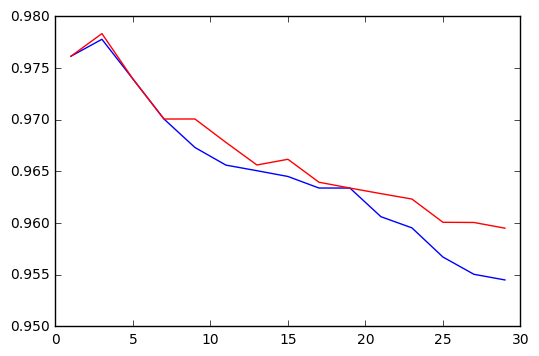

In [14]:
lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b')

lr2 = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X, y=y, cv=10)
    lr2.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr2,'r')
plt.show()

### Do the same using Grid Search method in python

In [20]:
from sklearn.grid_search import GridSearchCV
params = {'n_neighbors':range(1,30,2), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10)  # If cv is integer, by default is Stratifyed 
clf.fit(X_train, y_train)
print "Best Params=",clf.best_params_, "Accuracy=", clf.best_score_

Best Params= {'n_neighbors': 3, 'weights': 'distance'} Accuracy= 0.987379361544


Refem el model amb millors parametres i provem sobre el de test

In [21]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print sklearn.metrics.confusion_matrix(y_test, pred)
print sklearn.metrics.accuracy_score(y_test, pred)

[[51  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  1  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 49  1  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  1  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  1  0  0  0  1 45]]
0.988888888889


Anem a inspeccionar els errors en el test set

Penso que es:  4 i es 9


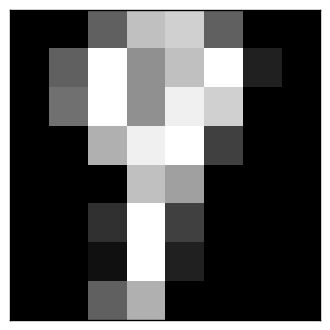

Penso que es:  8 i es 9


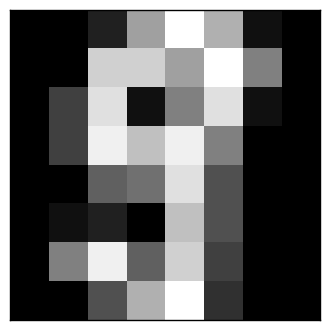

Penso que es:  7 i es 3


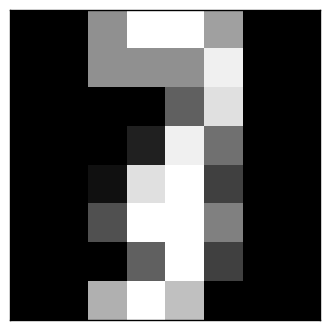

Penso que es:  1 i es 8


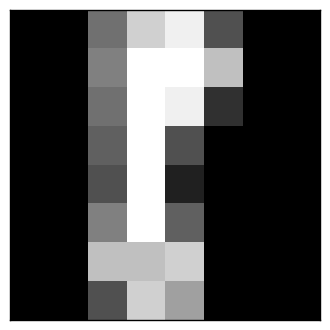

Penso que es:  6 i es 5


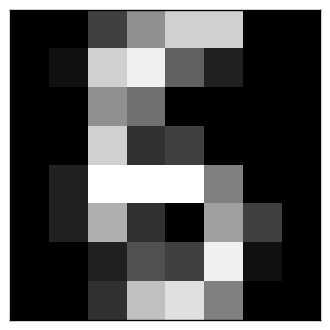

In [22]:
testerrors=[i for i,k in enumerate(pred) if k!=y_test[i]]
plt.gray()
plt.ion
for i in testerrors:
    plt.matshow(X_test[i].reshape(8,8))
    plt.xticks([]); plt.yticks([]);
    print "Penso que es: ", pred[i],"i es",y_test[i]
    plt.show()

# Exercise1:

Do a 10-fold Cross-Validation using Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB  # For numerical featuresm assuming normal distribution
from sklearn.naive_bayes import MultinomialNB  # For features with counting numbers (f.i. hown many times word appears in doc)
from sklearn.naive_bayes import BernoulliNB  # For binari features (f.i. word appears or not in document)
clf = GaussianNB()